# Data loading and visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
merged_df = pd.read_csv('data/cleaned/merged_df.csv')
display(merged_df.head())
print(merged_df.shape)

,State,County,Percent of Children with Confirmed BLLs ³5 µg/dL,Built 2020 or later,Built 2010 to 2019,Built 2000 to 2009,Built 1990 to 1999,Built 1980 to 1989,Built 1970 to 1979,Built 1960 to 1969,...,Income in the past 12 months at or above poverty level 18 to 64 years,Income in the past 12 months at or above poverty level 65 years and over,lat,lng,ADHD Percentage (Ever),ADHD Percentage (Current),ADHD Behavior Treatment(%),ADHD Medication(%),ADHD Meds or BT,Any Treatment
0,AL,AUTAUGA,NaN,0.002938,0.101283,0.216177,0.215929,0.098386,0.178486,0.116922,...,0.567738,0.151584,32.5349,-86.6427,12.7,12.1,50.6,77.0,84.3,91.2
1,AL,BALDWIN,NaN,0.003622,0.135008,0.272086,0.234956,0.152805,0.090183,0.051099,...,0.515682,0.202625,30.7277,-87.7226,12.7,12.1,50.6,77.0,84.3,91.2
2,AL,BARBOUR,NaN,0.000000,0.036856,0.093512,0.218651,0.164395,0.150081,0.124882,...,0.491164,0.187543,31.8696,-85.3932,12.7,12.1,50.6,77.0,84.3,91.2
3,AL,BIBB,NaN,0.000000,0.068679,0.148341,0.203817,0.160435,0.156774,0.110618,...,0.501439,0.183021,32.9986,-87.1265,12.7,12.1,50.6,77.0,84.3,91.2
4,AL,BLOUNT,0.0,0.000897,0.055123,0.194194,0.226077,0.143026,0.148612,0.093774,...,0.532138,0.165438,33.9809,-86.5674,12.7,12.1,50.6,77.0,84.3,91.2


(2151, 86)


Descriptive Statistics for 'Percent of Children with Confirmed BLLs ³5 µg/dL':
count    1352.000000
mean        1.282089
std         2.204850
min         0.000000
25%         0.000000
50%         0.565000
75%         1.700000
max        39.000000
Name: Percent of Children with Confirmed BLLs ³5 µg/dL, dtype: float64


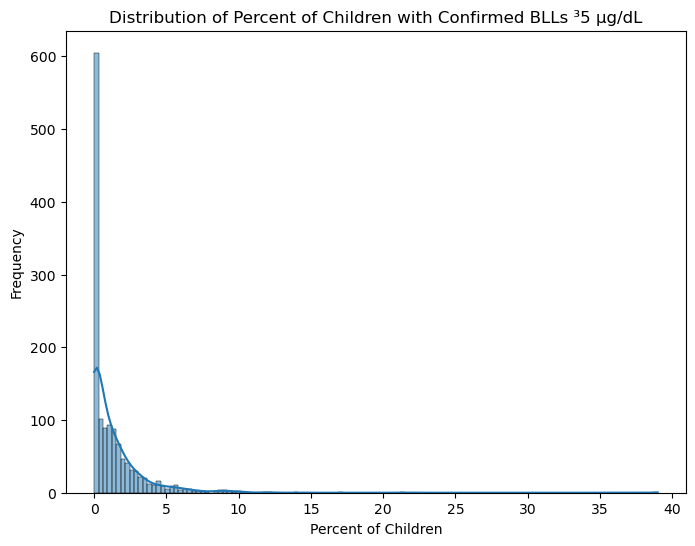

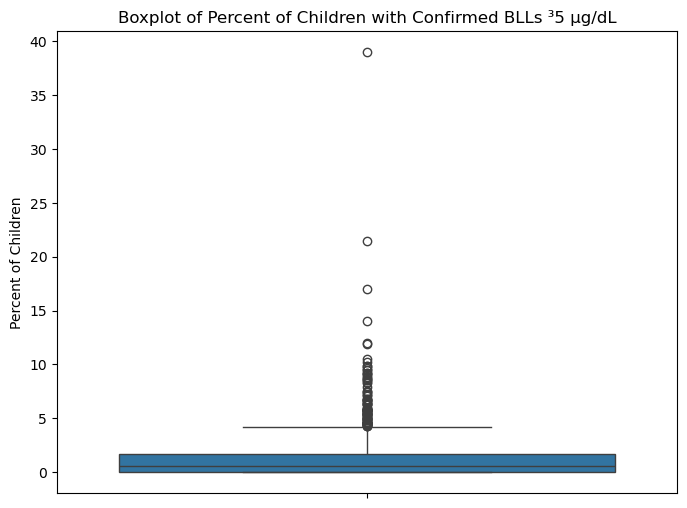

In [3]:
# Visualizations
bll_column = 'Percent of Children with Confirmed BLLs ³5 µg/dL'
bll_stats = merged_df[bll_column].describe()
print(f"Descriptive Statistics for '{bll_column}':\n{bll_stats}")

plt.figure(figsize=(8, 6))
sns.histplot(merged_df[bll_column].dropna(), kde=True)
plt.title('Distribution of Percent of Children with Confirmed BLLs ³5 µg/dL')
plt.xlabel('Percent of Children')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=merged_df[bll_column])
plt.title('Boxplot of Percent of Children with Confirmed BLLs ³5 µg/dL')
plt.ylabel('Percent of Children')
plt.show()

# EDA

In [4]:
# Get indices of outliers
outlier_indices = merged_df[merged_df['Percent of Children with Confirmed BLLs ³5 µg/dL'] > 10].index

# Remove the rows, store the result in filtered_df
filtered_df = merged_df.drop(index=outlier_indices)
print(filtered_df.shape)

(2143, 86)


Built 1939 or earlier                                           0.363901
lat                                                             0.214976
Educational services, and  health care and social assistance    0.177155
Built 1940 to 1949                                              0.176250
$80,000 to $89,999                                              0.165276
                                                                  ...   
ADHD Percentage (Current)                                      -0.221907
ADHD Percentage (Ever)                                         -0.222465
Built 1980 to 1989                                             -0.227788
Built 2000 to 2009                                             -0.273297
Built 1990 to 1999                                             -0.323392
Name: Percent of Children with Confirmed BLLs ³5 µg/dL, Length: 83, dtype: float64


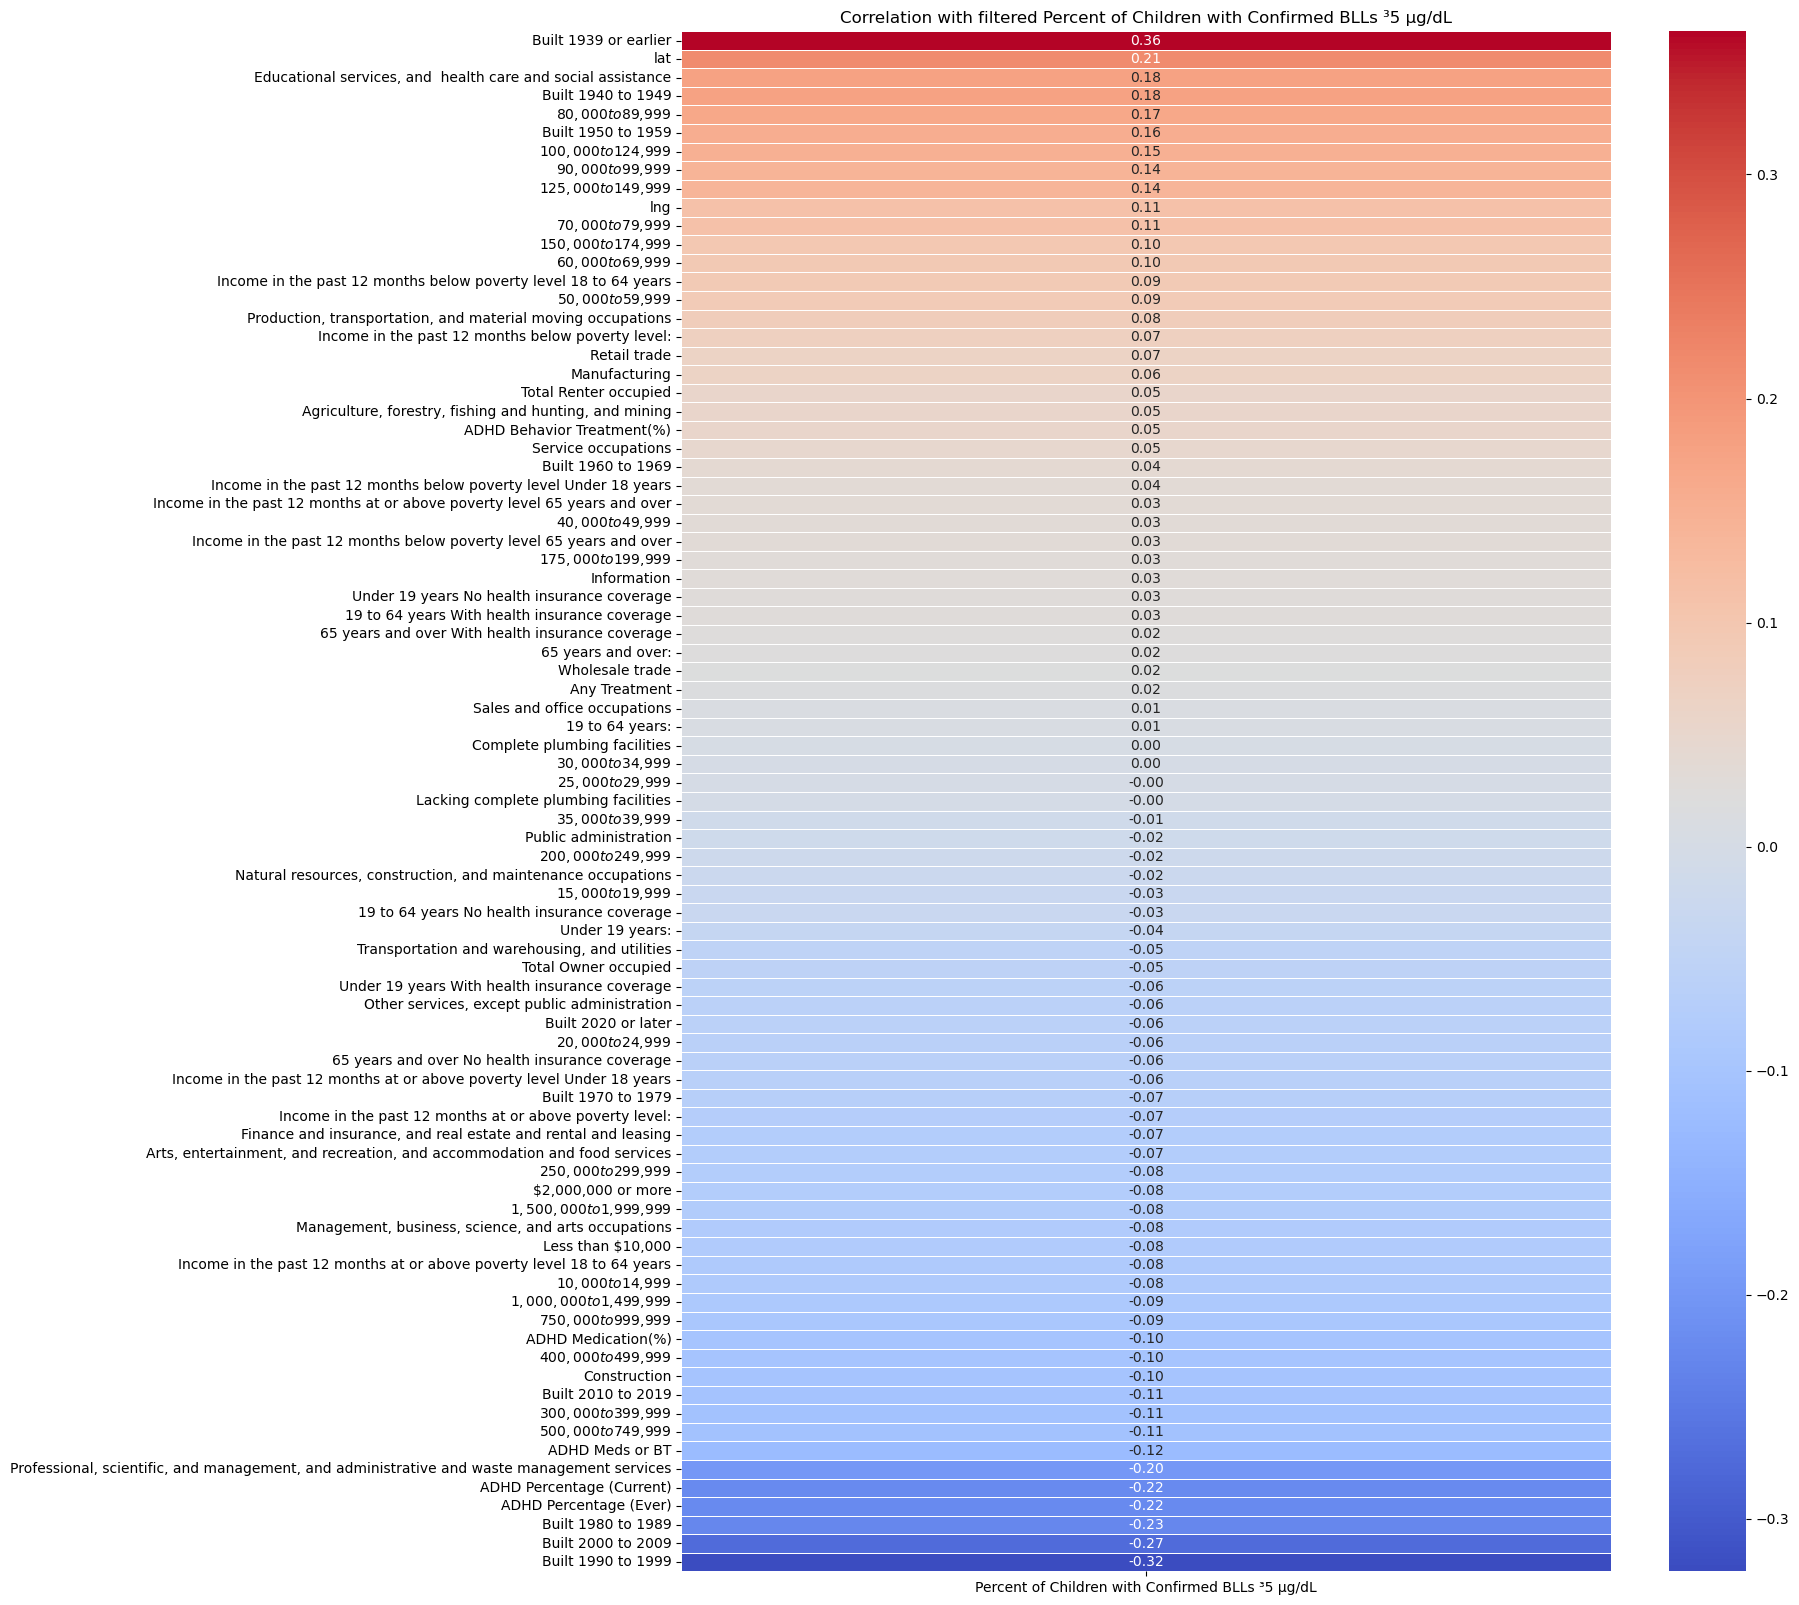

In [5]:
# Correlation analysis and visualization
# Remove relevant columns
columns_to_exclude = ['State', 'County']
correlation_filtered_df = filtered_df.drop(columns=columns_to_exclude, errors="ignore")

# Define modified data frame
correlation_with_bll = correlation_filtered_df.corr().drop('Percent of Children with Confirmed BLLs ³5 µg/dL')

# Sort the correlations in descending order
sorted_correlations = correlation_with_bll['Percent of Children with Confirmed BLLs ³5 µg/dL'].sort_values(ascending=False)

# Print correlations
print(sorted_correlations)

# Visualize
plt.figure(figsize=(15, 20))
sns.heatmap(sorted_correlations.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f"Correlation with filtered {'Percent of Children with Confirmed BLLs ³5 µg/dL'}")
plt.show()

In [6]:
# Determine number of missing values in filtered_df
missing_percentage = filtered_df[bll_column].isnull().sum() / len(filtered_df) * 100
print(f"Percentage of missing values in '{bll_column}': {missing_percentage:.2f}%")

Percentage of missing values in 'Percent of Children with Confirmed BLLs ³5 µg/dL': 37.28%


# Data cleaning for features

In [7]:
# Identify columns with missing values, excluding specified columns
cols_with_missing = [col for col in filtered_df.columns if filtered_df[col].isnull().any()
and col not in ['Percent of Children with Confirmed BLLs ³5 µg/dL']]

print(len(cols_with_missing))
print(cols_with_missing)

77
['Built 2020 or later', 'Built 2010 to 2019', 'Built 2000 to 2009', 'Built 1990 to 1999', 'Built 1980 to 1989', 'Built 1970 to 1979', 'Built 1960 to 1969', 'Built 1950 to 1959', 'Built 1940 to 1949', 'Built 1939 or earlier', 'Complete plumbing facilities', 'Lacking complete plumbing facilities', 'Less than $10,000', '$10,000 to $14,999', '$15,000 to $19,999', '$20,000 to $24,999', '$25,000 to $29,999', '$30,000 to $34,999', '$35,000 to $39,999', '$40,000 to $49,999', '$50,000 to $59,999', '$60,000 to $69,999', '$70,000 to $79,999', '$80,000 to $89,999', '$90,000 to $99,999', '$100,000 to $124,999', '$125,000 to $149,999', '$150,000 to $174,999', '$175,000 to $199,999', '$200,000 to $249,999', '$250,000 to $299,999', '$300,000 to $399,999', '$400,000 to $499,999', '$500,000 to $749,999', '$750,000 to $999,999', '$1,000,000 to $1,499,999', '$1,500,000 to $1,999,999', '$2,000,000 or more', 'Total Owner occupied', 'Total Renter occupied', 'Under 19 years:', 'Under 19 years With health i

In [8]:
# Impute missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=42) #one can adjusts max_iter
imputer.fit(filtered_df[cols_with_missing])
imputed_data = imputer.transform(filtered_df[cols_with_missing])
filtered_df[cols_with_missing] = imputed_data

In [9]:
# Check to see if there are columns with missing values left
cols_with_missing = [col for col in filtered_df.columns if filtered_df[col].isnull().any()
and col not in ['Percent of Children with Confirmed BLLs ³5 µg/dL']]

print(cols_with_missing)

[]


# Feature engineering

In [10]:
# Set a correlation threshold to remove features
corr_threshold = 0.02

# Use the previously calculated correlation_with_bll
# Get features with low correlation
low_corr_features = correlation_with_bll[
    abs(correlation_with_bll['Percent of Children with Confirmed BLLs ³5 µg/dL']) <= corr_threshold
].index.tolist()

# Print low_corr_features and their correlations for debugging
print("Low Correlation Features:")
for feature in low_corr_features:
    corr_value = correlation_with_bll.loc[feature, 'Percent of Children with Confirmed BLLs ³5 µg/dL']
    print(f"  {feature}: {corr_value}")

# Remove house price and rent price features and some more

cols_to_remove = list(set(low_corr_features + [ 
    'Less than $10,000',
    '$10,000 to $14,999',
    '$15,000 to $19,999',
    '$20,000 to $24,999',
    '$25,000 to $29,999',
    '$30,000 to $34,999',
    '$35,000 to $39,999',
    '$40,000 to $49,999',
    '$50,000 to $59,999',
    '$60,000 to $69,999',
    '$70,000 to $79,999',
    '$80,000 to $89,999',
    '$90,000 to $99,999',
    '$100,000 to $124,999',
    '$125,000 to $149,999',
    '$150,000 to $174,999',
    '$175,000 to $199,999',
    '$200,000 to $249,999',
    '$250,000 to $299,999',
    '$300,000 to $399,999',
    '$400,000 to $499,999',
    '$500,000 to $749,999',
    '$750,000 to $999,999',
    '$1,000,000 to $1,499,999',
    '$1,500,000 to $1,999,999',
    '$2,000,000 or more',
    
]))

# Print cols_to_remove to verify features being dropped
print("\nColumns to Remove:")
print(cols_to_remove)
print(f"The number of feature columns we removed is: {len(cols_to_remove)}")

Low Correlation Features:
  Complete plumbing facilities: 0.0030562136967148584
  Lacking complete plumbing facilities: -0.003056213696714379
  $25,000 to $29,999: -0.0002557588027303706
  $30,000 to $34,999: 0.0007314796452007264
  $35,000 to $39,999: -0.014575953893290096
  $200,000 to $249,999: -0.019529659071659572
  19 to 64 years:: 0.008386030469595395
  Wholesale trade: 0.019310688628678664
  Public administration: -0.016909635318647927
  Sales and office occupations: 0.010583732755070597
  Any Treatment: 0.0161735858700385

Columns to Remove:
['$35,000 to $39,999', '$175,000 to $199,999', '$300,000 to $399,999', '$125,000 to $149,999', '$750,000 to $999,999', '$70,000 to $79,999', '$250,000 to $299,999', '$80,000 to $89,999', '$25,000 to $29,999', 'Wholesale trade', '$100,000 to $124,999', 'Complete plumbing facilities', '$20,000 to $24,999', '$40,000 to $49,999', '$2,000,000 or more', '$200,000 to $249,999', '$50,000 to $59,999', 'Any Treatment', '19 to 64 years:', '$30,000 to

In [11]:
# Drop the columns from filtered_df
filtered_df = filtered_df.drop(columns=cols_to_remove, errors="ignore")
print(filtered_df.shape)

(2143, 53)


In [12]:
# Count non-null values in the target column
non_null_count = filtered_df['Percent of Children with Confirmed BLLs ³5 µg/dL'].notna().sum()

# Print the count
print(f"Number of rows with non-null percent bll values: {non_null_count}")

Number of rows with non-null percent bll values: 1344


# Data splitting


In [13]:
from sklearn.model_selection import train_test_split

# Remove 'State' and 'County'
new_df = filtered_df.drop(columns=['State', 'County'])
# Split data into training and prediction sets
df_train = new_df[filtered_df[bll_column].notnull()]
df_predict = new_df[filtered_df[bll_column].isnull()]

# Features (X) and target variable (y)
X_train = df_train.drop(columns=bll_column)
y_train = df_train[bll_column]
X_predict = df_predict.drop(columns=bll_column)

# Split training sets into 80/20
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("X_predict", X_predict.shape)


X_train shape: (1075, 50)
X_val shape: (269, 50)
y_train shape: (1075,)
y_val shape: (269,)
X_predict (799, 50)


In [14]:
# Scale ADHD columns to be over 1 instead of 100

adhd_cols = [col for col in X_train.columns if col.startswith('ADHD')]
if 'Any Treatment' not in cols_to_remove:  
    adhd_cols.append('Any Treatment')
    
for col in adhd_cols:
    X_train[col] = X_train[col] / 100 
    X_val[col] = X_val[col] / 100  
    X_predict[col] = X_predict[col] / 100  

# Modeling with Extra Trees

In [15]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint, uniform

# Define Extra Trees Regressor
extra_trees_reg = ExtraTreesRegressor(random_state=42)

# Define a Refined Hyperparameter Search Space
param_distributions = {
    'n_estimators': randint(200, 500), 
    'max_depth': randint(10, 30),  
    'min_samples_split': randint(2, 10),  
    'min_samples_leaf': randint(1, 5),  
    'max_features': ['sqrt', 'log2', 0.5, 0.7, None],  
    'bootstrap': [True, False],
    'criterion': ['squared_error', 'absolute_error'],
    'ccp_alpha': uniform(0.0, 0.05)  
}

# Create RandomizedSearchCV
random_search_extra_trees = RandomizedSearchCV(
    estimator=extra_trees_reg,
    param_distributions=param_distributions,
    n_iter=100,  
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    error_score='raise' 
)

# Fit the model using RandomizedSearchCV with Try-Except Block
try:
    random_search_extra_trees.fit(X_train, y_train)
except ValueError as e:
    print(f"Error during fit: {e}")
    # Handle the error (e.g., log it, adjust hyperparameter space, etc.)

# 6. Get the best parameters and best estimator
best_params_extra_trees = random_search_extra_trees.best_params_
best_extra_trees_reg = random_search_extra_trees.best_estimator_

# 7. Make predictions and evaluate
y_pred_extra_trees = best_extra_trees_reg.predict(X_val)
mse_extra_trees = mean_squared_error(y_val, y_pred_extra_trees)
r2_extra_trees = r2_score(y_val, y_pred_extra_trees)
rmse_extra_trees = np.sqrt(mse_extra_trees)

print("Hyperparameter Tuned Extra Trees Regression Results:")
print(f"  Best Parameters: {best_params_extra_trees}")
print(f"  Root Mean Squared Error: {rmse_extra_trees}")
print(f"  R-squared: {r2_extra_trees}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, ccp_alpha=0.039827149343011646, criterion=squared_error, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=321; total time=   0.9s
[CV] END bootstrap=True, ccp_alpha=0.004998745790900145, criterion=squared_error, max_depth=13, max_features=0.5, min_samples_leaf=2, min_samples_split=6, n_estimators=457; total time=   0.9s
[CV] END bootstrap=True, ccp_alpha=0.039827149343011646, criterion=squared_error, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimators=321; total time=   0.9s
[CV] END bootstrap=True, ccp_alpha=0.004998745790900145, criterion=squared_error, max_depth=13, max_features=0.5, min_samples_leaf=2, min_samples_split=6, n_estimators=457; total time=   0.9s
[CV] END bootstrap=True, ccp_alpha=0.039827149343011646, criterion=squared_error, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=8, n_estimator

In [16]:
# Get feature importance
feature_importance_extra_trees = best_extra_trees_reg.feature_importances_

# Create df for feature importance
feature_importance_extra_trees_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_extra_trees
})

# Sort by importance
feature_importance_extra_trees_df = feature_importance_extra_trees_df.sort_values(by='Importance', ascending=False)

# Select top 10 features
top_10_features_extra_trees = feature_importance_extra_trees_df['Feature'].head(10).tolist()

# Print feature names and indices for verification
for feature in top_10_features_extra_trees:
    feature_index = X_train.columns.get_loc(feature)
    print(f"Feature: {feature}, Index: {feature_index}")

Feature: Built 1939 or earlier, Index: 9
Feature: ADHD Percentage (Ever), Index: 45
Feature: Built 1990 to 1999, Index: 3
Feature: lat, Index: 43
Feature: ADHD Behavior Treatment(%), Index: 47
Feature: ADHD Percentage (Current), Index: 46
Feature: Built 2000 to 2009, Index: 2
Feature: lng, Index: 44
Feature: ADHD Meds or BT, Index: 49
Feature: ADHD Medication(%), Index: 48


# Visualization with Extra Trees

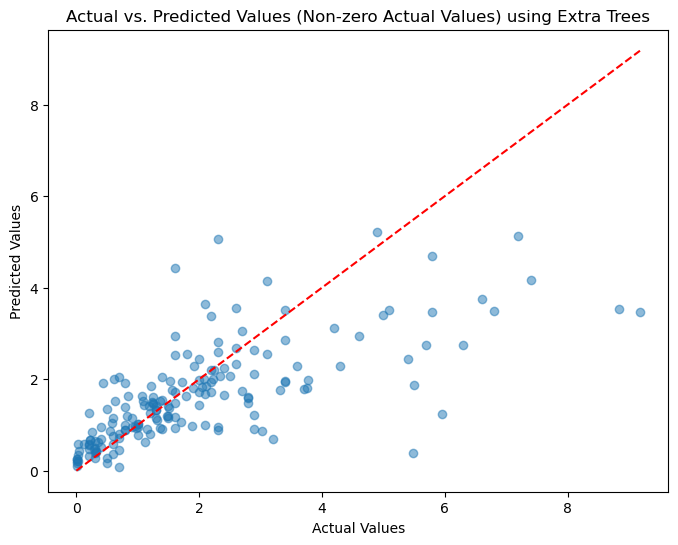

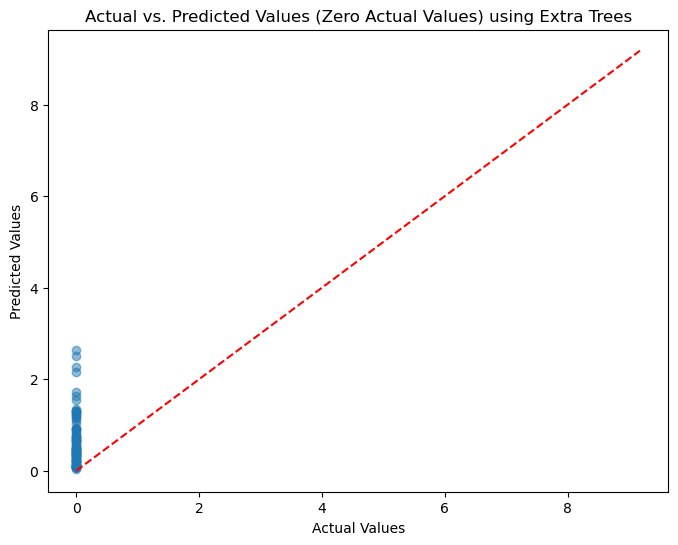

In [17]:
# Scatter plot of predicted versus actual values (Non-zero actual values)
non_zero_indices = y_val != 0  # Get indices where actual values are not zero

plt.figure(figsize=(8, 6))
plt.scatter(y_val[non_zero_indices], y_pred_extra_trees[non_zero_indices], alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Non-zero Actual Values) using Extra Trees")
plt.show()

# Scatter plot of predicted versus actual values (Zero actual values)
zero_indices = y_val == 0  # Get indices where actual values are zero

plt.figure(figsize=(8, 6))
plt.scatter(y_val[zero_indices], y_pred_extra_trees[zero_indices], alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Zero Actual Values) using Extra Trees")
plt.show()

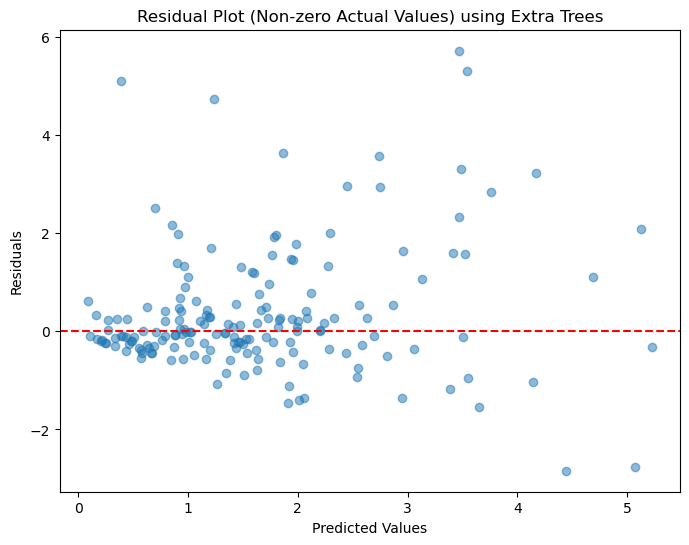

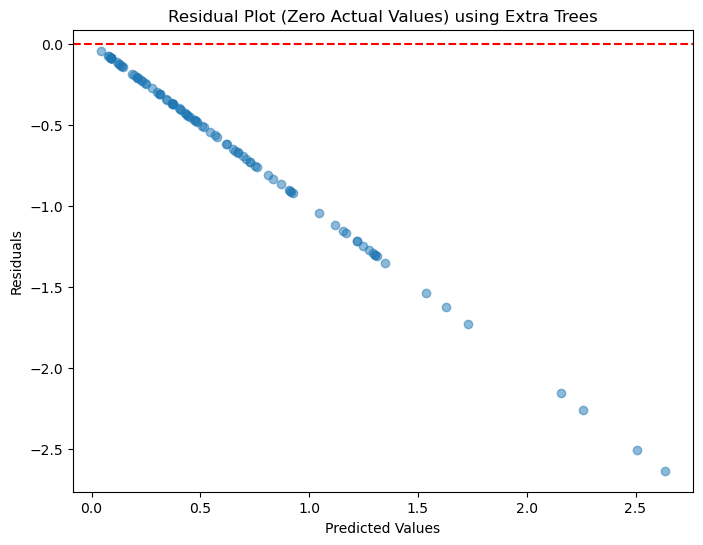

In [18]:
# Residual plot (Non-zero actual values)
residuals_non_zero = y_val[non_zero_indices] - y_pred_extra_trees[non_zero_indices]

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_extra_trees[non_zero_indices], residuals_non_zero, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Non-zero Actual Values) using Extra Trees")
plt.show()

# Residual plot (Zero actual values)
residuals_zero = y_val[zero_indices] - y_pred_extra_trees[zero_indices]

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_extra_trees[zero_indices], residuals_zero, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Zero Actual Values) using Extra Trees")
plt.show()

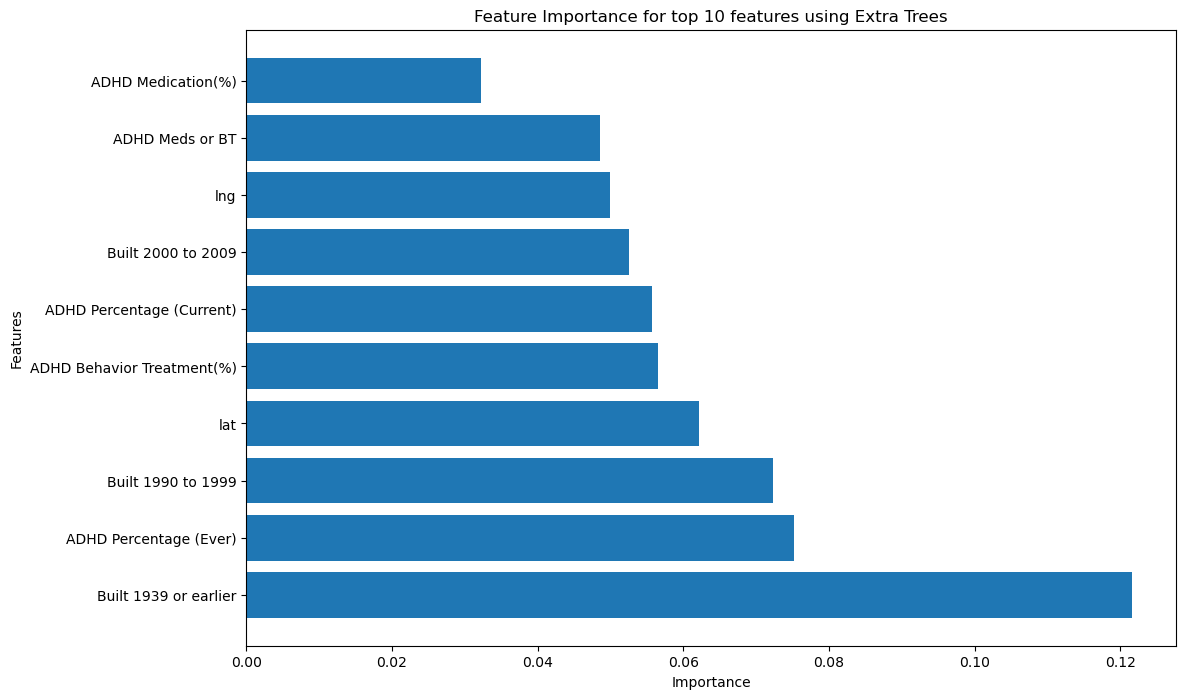

In [19]:
# Bar chart of top 10 features
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_extra_trees_df['Feature'].head(10), feature_importance_extra_trees_df['Importance'].head(10)) #Changed this line
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance for top 10 features using Extra Trees")
plt.show()

# Model training with Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define parameter grid
param_grid = {
    'n_estimators': np.arange(100,500,50),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create Random Forest Regressor object
rf_regressor = RandomForestRegressor(random_state=42)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model to the scaled training data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   4.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   3.8s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=25

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [21]:
# Get the best parameters
best_params_rf = random_search.best_params_
print("Best Parameters:", best_params_rf)

# Get the best model
best_model_rf = random_search.best_estimator_

# Make predictions
y_pred_rf = best_model_rf.predict(X_val)

# Evaluate MSE and R2
mse_rf = mean_squared_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

# Calculate RMSE
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest - Root Mean Squared Error: {rmse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")

Best Parameters: {'n_estimators': np.int64(150), 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15}
Random Forest - Root Mean Squared Error: 1.2980602579798108
Random Forest - R-squared: 0.42658665585493727


In [22]:
# Get feature importance
feature_importance_rf = best_model_rf.feature_importances_

# Create df for feature importance
feature_importance_rf_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_rf
})

# Sort by importance
feature_importance_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False)

# Select top 10 features
top_10_features_rf = feature_importance_rf_df['Feature'].head(10).tolist()

# Print feature names and indices for verification
for feature in top_10_features_rf:
    feature_index = X_train.columns.get_loc(feature)
    print(f"Feature: {feature}, Index: {feature_index}")

Feature: Built 1990 to 1999, Index: 3
Feature: Built 1939 or earlier, Index: 9
Feature: Built 2000 to 2009, Index: 2
Feature: lat, Index: 43
Feature: lng, Index: 44
Feature: ADHD Behavior Treatment(%), Index: 47
Feature: ADHD Percentage (Current), Index: 46
Feature: ADHD Meds or BT, Index: 49
Feature: ADHD Percentage (Ever), Index: 45
Feature: Built 1940 to 1949, Index: 8


In [23]:
# Feature Selection: Select the top 10 features from X_train and X_val
X_train_selected_rf = X_train[top_10_features_rf]
X_val_selected_rf = X_val[top_10_features_rf]


# Implement Random Forest again
model_rf = RandomForestRegressor(random_state=42, **best_params_rf)

# Train the model on the selected features
model_rf.fit(X_train_selected_rf, y_train)

# Make predictions on the validation set
y_pred_rf = model_rf.predict(X_val_selected_rf)

# Evaluate the model
mse_rf = mean_squared_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Model - Root Mean Squared Error: {rmse_rf}")
print(f"Model - R-squared: {r2_rf}")

Model - Root Mean Squared Error: 1.2392017935044497
Model - R-squared: 0.4774087246934693


# Visualizations of predicted vs actual values and bar chart for feature importance (Random Forest)

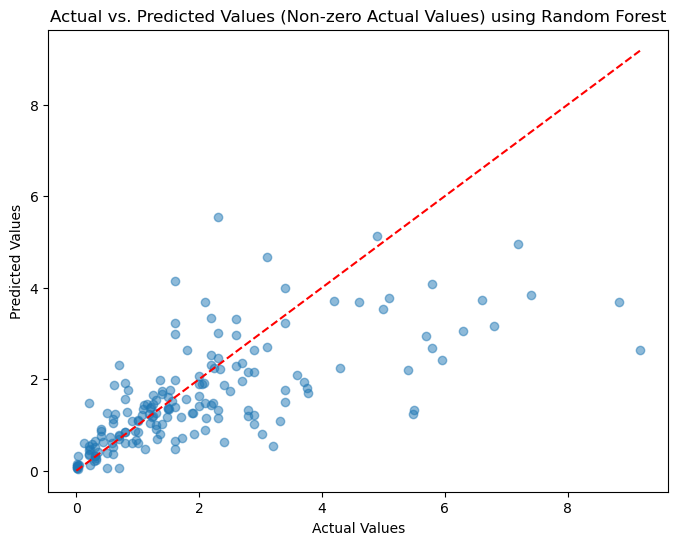

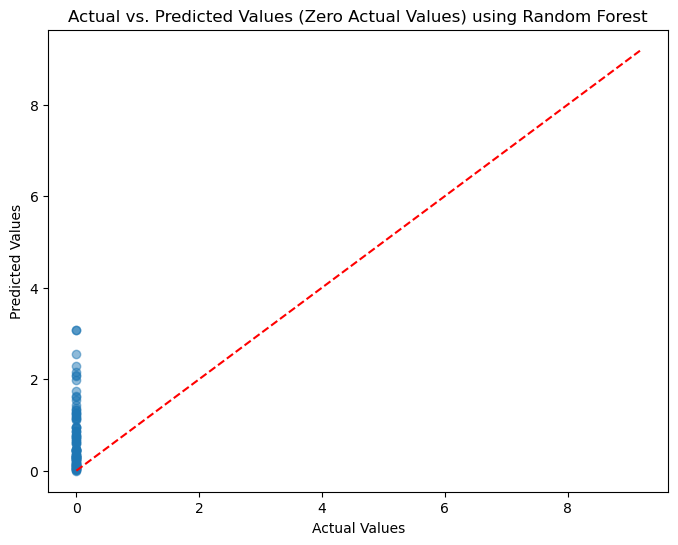

In [24]:
# Scatter plot of predicted versus actual values (Non-zero actual values)
non_zero_indices = y_val != 0  # Get indices where actual values are not zero

plt.figure(figsize=(8, 6))
plt.scatter(y_val[non_zero_indices], y_pred_rf[non_zero_indices], alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Non-zero Actual Values) using Random Forest")
plt.show()

# Scatter plot of predicted versus actual values (Zero actual values)
zero_indices = y_val == 0  # Get indices where actual values are zero

plt.figure(figsize=(8, 6))
plt.scatter(y_val[zero_indices], y_pred_rf[zero_indices], alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Zero Actual Values) using Random Forest")
plt.show()

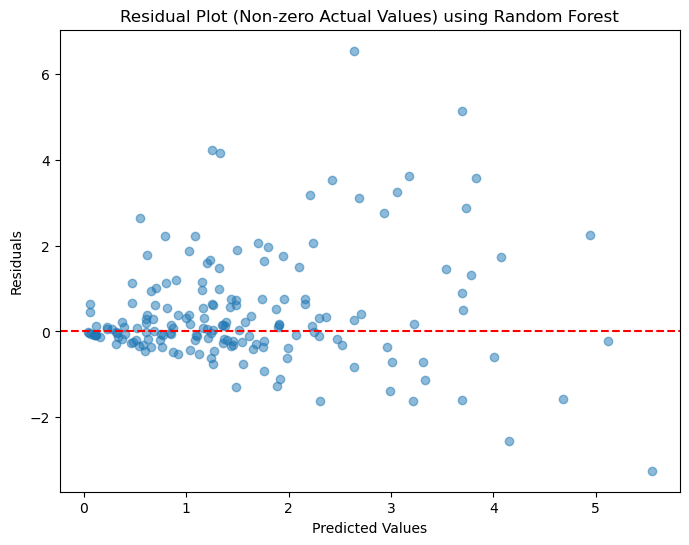

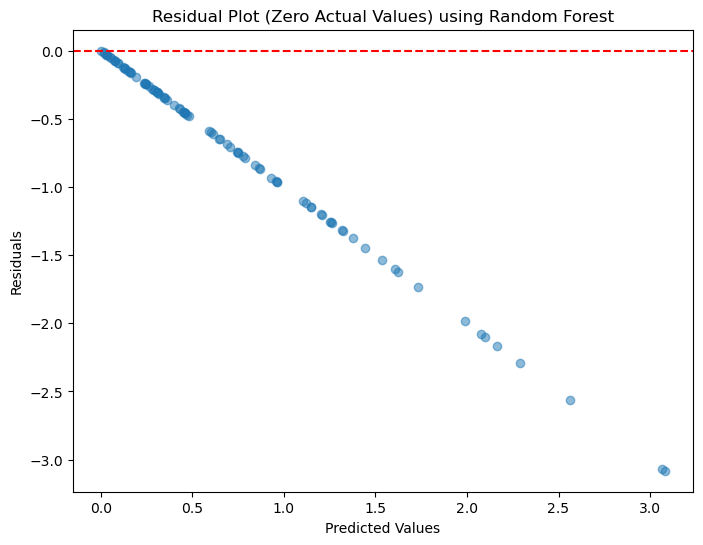

In [25]:
# Residual plot (Non-zero actual values)
residuals_non_zero = y_val[non_zero_indices] - y_pred_rf[non_zero_indices]

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf[non_zero_indices], residuals_non_zero, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Non-zero Actual Values) using Random Forest")
plt.show()

# Residual plot (Zero actual values)
residuals_zero = y_val[zero_indices] - y_pred_rf[zero_indices]

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf[zero_indices], residuals_zero, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Zero Actual Values) using Random Forest")
plt.show()

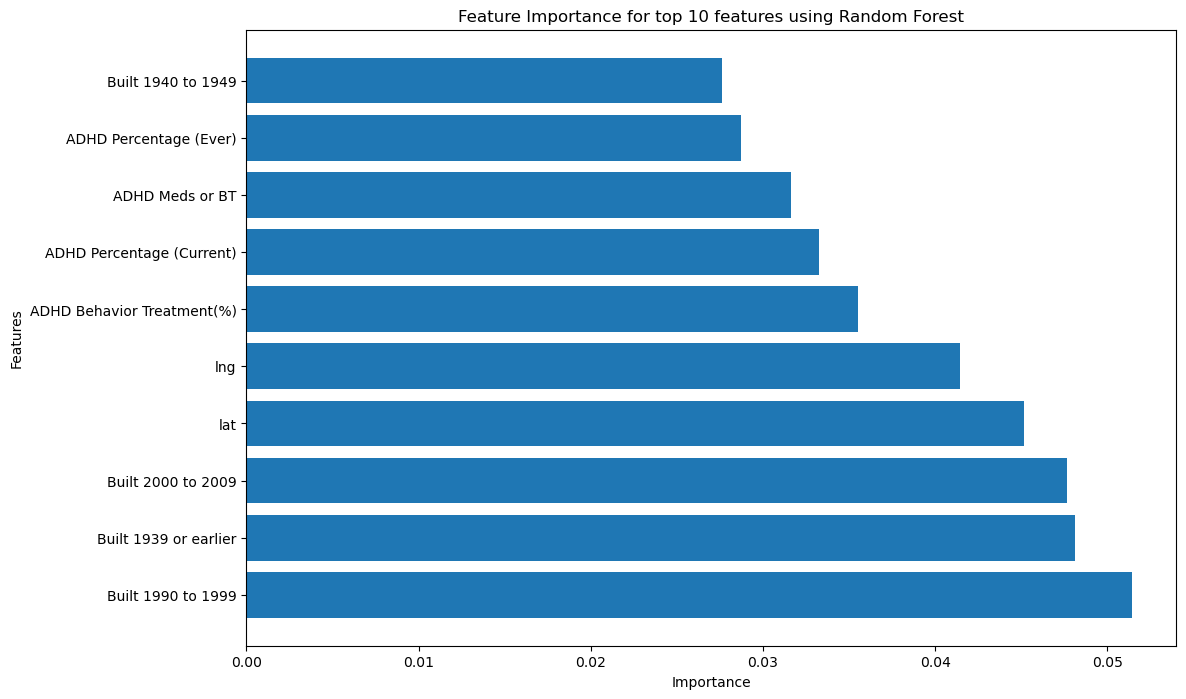

In [26]:
# Bar chart of top 10 features
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_rf_df['Feature'].head(10), feature_importance_rf_df['Importance'].head(10)) #Changed this line
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance for top 10 features using Random Forest")
plt.show()

# Model training with XGboost

In [27]:
import xgboost as xgb

# Define XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

# Create RandomizedSearchCV object
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_regressor,
    param_distributions=param_grid_xgb,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search_xgb.fit(X_train, y_train)

# Get best params and best model
best_params_xgb = random_search_xgb.best_params_
best_xgb_model = random_search_xgb.best_estimator_
print("Best XGBoost Parameters:", best_params_xgb)

# Make predictions on validation set
y_pred_xgb = best_xgb_model.predict(X_val)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.2, max_depth=7, 

In [28]:
# Evaluate the model
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
r2_xgb = r2_score(y_val, y_pred_xgb)

# Calculate RMSE
rmse_xgb = np.sqrt(mse_xgb)

print(f"XGBoost - Root Mean Squared Error: {rmse_xgb}")
print(f"XGBoost - R-squared: {r2_xgb}")

XGBoost - Root Mean Squared Error: 1.2485802486037252
XGBoost - R-squared: 0.46946870242700645


In [ ]:
# Get feature importance
feature_importance_xgb = best_xgb_model.feature_importances_

# Create df for feature importance
feature_importance_xgb_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_xgb
})

# Sort by importance
feature_importance_xgb_df = feature_importance_xgb_df.sort_values(by='Importance', ascending=False)

# Select top 30 features
top_30_features_xgb = feature_importance_xgb_df['Feature'].head(30).tolist()

# Print feature names and indices for verification
for feature in top_30_features_xgb:
    feature_index = X_train.columns.get_loc(feature)
    print(f"Feature: {feature}, Index: {feature_index}")

Feature: Built 1939 or earlier, Index: 9
Feature: ADHD Percentage (Ever), Index: 45
Feature: Built 1990 to 1999, Index: 3
Feature: ADHD Behavior Treatment(%), Index: 47
Feature: lat, Index: 43
Feature: Professional, scientific, and management, and administrative and waste management services, Index: 27
Feature: ADHD Medication(%), Index: 48
Feature: ADHD Percentage (Current), Index: 46
Feature: lng, Index: 44
Feature: Income in the past 12 months at or above poverty level:, Index: 39
Feature: ADHD Meds or BT, Index: 49
Feature: Built 2000 to 2009, Index: 2
Feature: 19 to 64 years No health insurance coverage, Index: 16
Feature: Built 2020 or later, Index: 0
Feature: Total Renter occupied, Index: 11
Feature: 65 years and over With health insurance coverage, Index: 18
Feature: Construction, Index: 21
Feature: Retail trade, Index: 23
Feature: 65 years and over No health insurance coverage, Index: 19
Feature: Built 2010 to 2019, Index: 1
Feature: Income in the past 12 months at or above po

In [ ]:
# Feature Selection: Select the top 30 features from X_train and X_val
X_train_selected_xgb = X_train[top_30_features_xgb]
X_val_selected_xgb = X_val[top_30_features_xgb]


# Implement XGBoost again
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **best_params_xgb)

# Train the model on the selected features
model_xgb.fit(X_train_selected_xgb, y_train)

# Make predictions on the validation set
y_pred_xgb = model_xgb.predict(X_val_selected_xgb)

# Evaluate the model
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
r2_xgb = r2_score(y_val, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print(f"Model - Root Mean Squared Error: {rmse_xgb}")
print(f"Model - R-squared: {r2_xgb}")

Model - Root Mean Squared Error: 1.2070571190595585
Model - R-squared: 0.5041689361513528


# Visualizations of predicted vs actual values and bar chart for feature importance (xgboost)

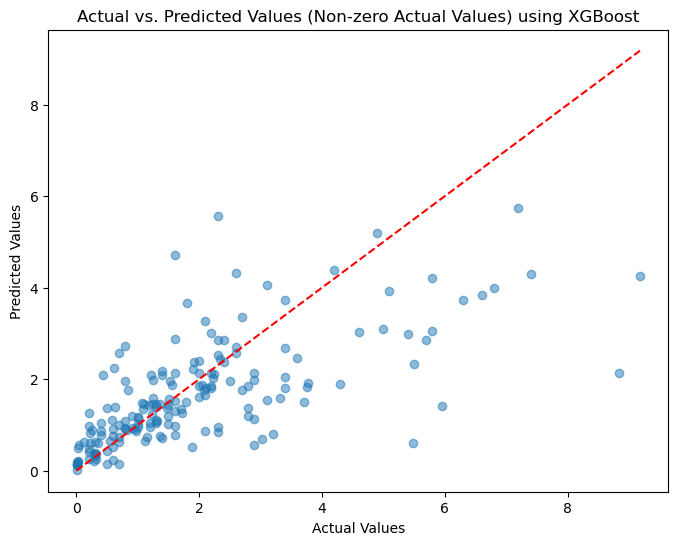

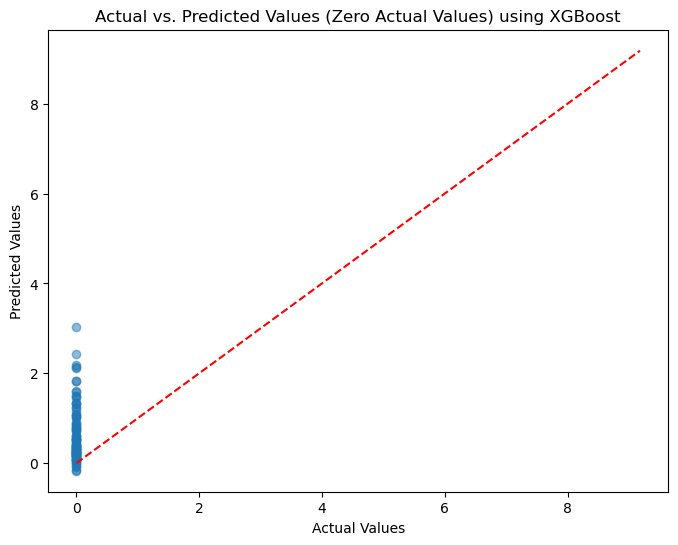

In [31]:
# Scatter plot of predicted versus actual values (Non-zero actual values)
non_zero_indices = y_val != 0  # Get indices where actual values are not zero

plt.figure(figsize=(8, 6))
plt.scatter(y_val[non_zero_indices], y_pred_xgb[non_zero_indices], alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Non-zero Actual Values) using XGBoost")
plt.show()

# Scatter plot of predicted versus actual values (Zero actual values)
zero_indices = y_val == 0  # Get indices where actual values are zero

plt.figure(figsize=(8, 6))
plt.scatter(y_val[zero_indices], y_pred_xgb[zero_indices], alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Zero Actual Values) using XGBoost")
plt.show()

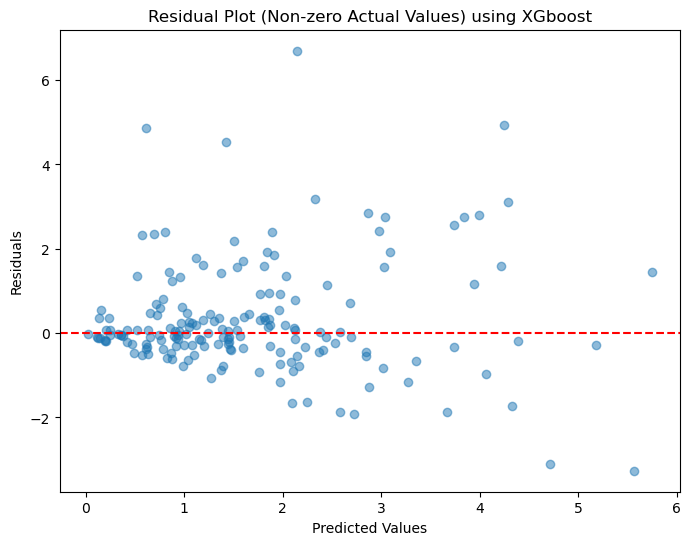

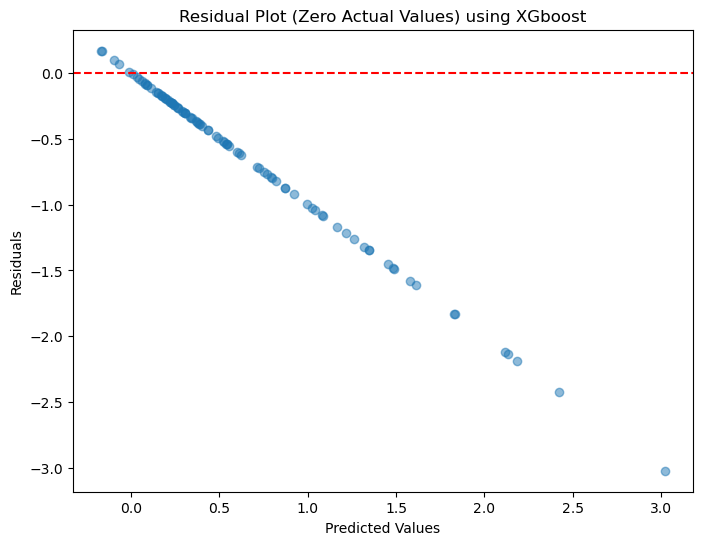

In [32]:
# Residual plot (Non-zero actual values)
residuals_non_zero = y_val[non_zero_indices] - y_pred_xgb[non_zero_indices]

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb[non_zero_indices], residuals_non_zero, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Non-zero Actual Values) using XGboost")
plt.show()

# Residual plot (Zero actual values)
residuals_zero = y_val[zero_indices] - y_pred_xgb[zero_indices]

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb[zero_indices], residuals_zero, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Zero Actual Values) using XGboost")
plt.show()

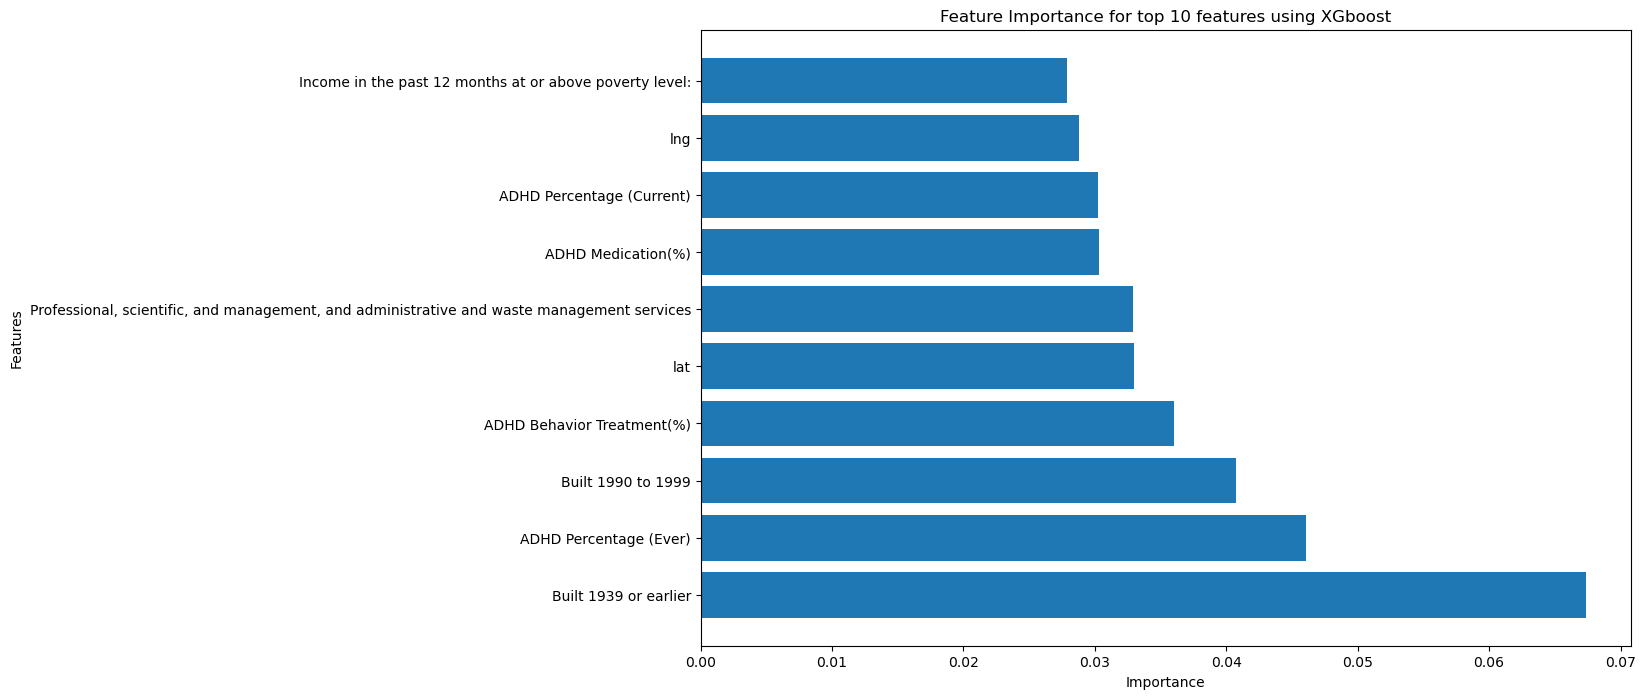

In [34]:
# Bar chart of top 10 features
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_xgb_df['Feature'].head(10), feature_importance_xgb_df['Importance'].head(10)) #Changed this line
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance for top 10 features using XGboost")
plt.show()